In [3]:
# Da rimuovere prima dell'upload finale
%load_ext autoreload
%autoreload 2

** Preliminaries **

Import the necessary forecasting functions and methods

In [4]:
import forecasting as f

Define a time series as a collection of comma-separated values

In [23]:
ts1 = f.data(1)
ts2 = f.data(2)

Chart of the times series

In [29]:
# forecasting.chart(<time_series_name>=<time_series>)
help(f.naive)


Help on function naive in module forecasting:

naive(ts)
    Naive forecasting
    
    Usage:
        naive(ts=time_series)
    
    Parameters:
        ts (list): A time series of the time series
    
    Returns:
        list: naive forecasti for the time series



Caricamento dei dati della prima serie storica

In [32]:
ts = f.data(1)
naive = f.naive(ts)

Grafico della serie storica

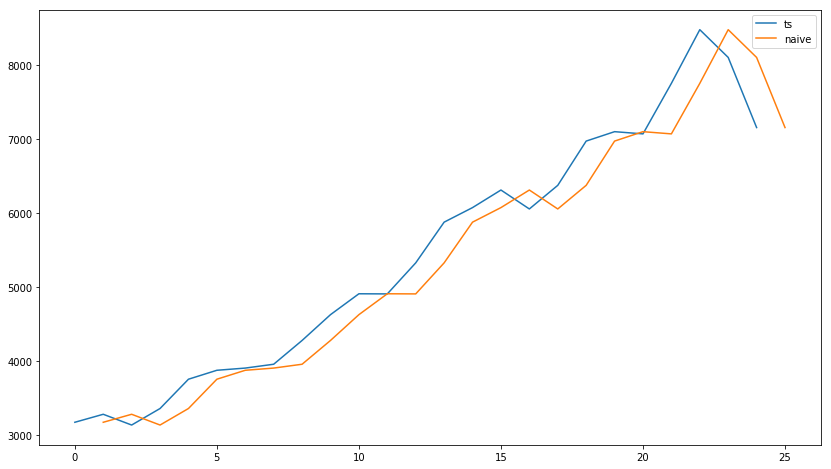

In [37]:
f.plot(ts=ts, naive=naive)

In [38]:
f.mape(ts, naive)

0.054440602667952705

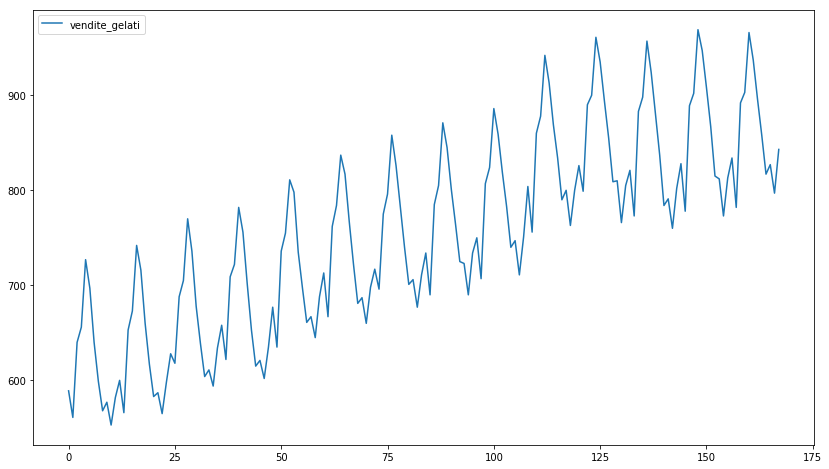

In [6]:
forecasting.chart(vendit_gelati=data)

In [41]:
ts - naive

TypeError: unsupported operand type(s) for -: 'list' and 'list'

Modello Naive

In [7]:
previsione_naive = forecasting.naive(data)

In [ ]:
previsione_naive

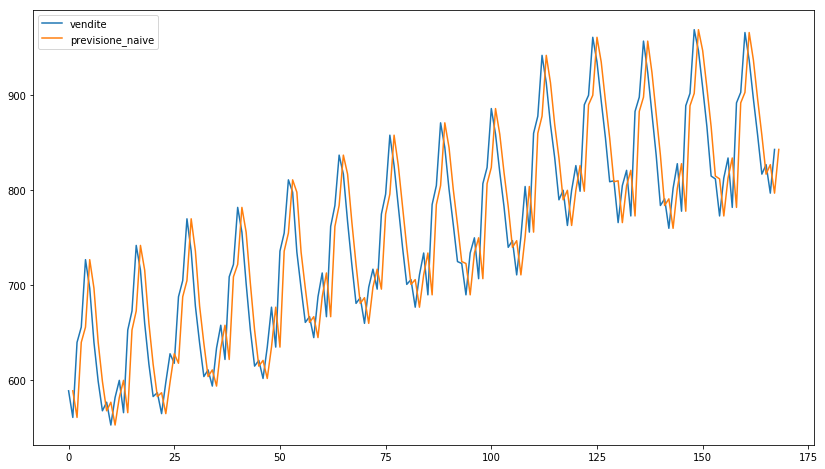

In [8]:
forecasting.chart(vendite=data, previsione_naive=previsione_naive)

Previsione con media mobile

In [43]:
forecast_mm_3 = f.ma(data, 3)
forecast_mm_5 = f.ma(data, 5)
forecast_mm_12= f.ma(data, 12)


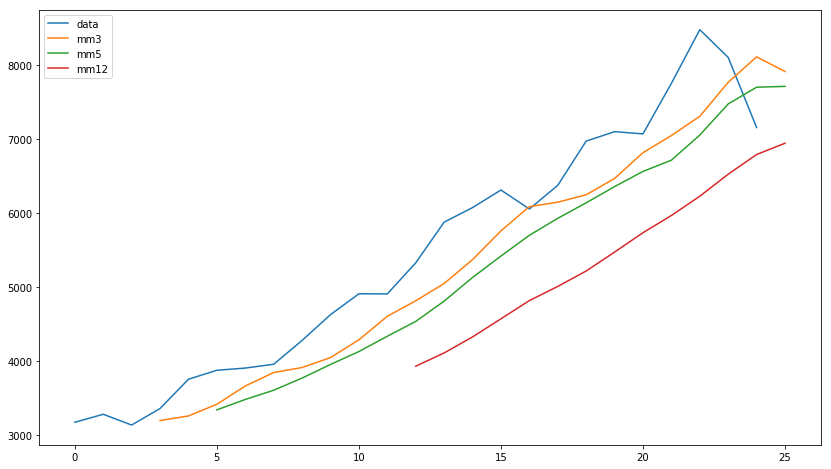

In [44]:
f.plot(data=data,
                  mm3=forecast_mm_3,
                  mm5=forecast_mm_5,
                  mm12=forecast_mm_12)

Previsione con smoothing

In [45]:
forecast = f.forecast(data, alpha=1, debug=True)

{'smoothing_level': 1, 'smoothing_slope': None, 'smoothing_seasonal': None, 'damping_slope': nan, 'initial_level': 3173.0, 'initial_slope': nan, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


Grafico della serie storica e della previsione

In [ ]:
forecasting.chart(data=data, smorzamento=forecast, naive=previsione_naive)

Misure di prestazione: previsione media mobile

In [11]:
forecasting.kpi(data, previsione_naive)

ME:  1.5209580838323353
MAE:  39.0059880239521
MAPE:  0.051595480032879074
MSE:  2054.083832335329


Misure di prestazione: previsione media mobile

In [ ]:
forecasting.kpi(data, forecast)

In [47]:
forecast_trend = f.forecast(ts, optimized=True, debug=True)

{'smoothing_level': 1.0, 'smoothing_slope': nan, 'smoothing_seasonal': nan, 'damping_slope': nan, 'initial_level': 3173.0, 'initial_slope': nan, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


In [ ]:
forecasting.kpi(data, forecast_trend)

In [5]:
print('piipo')

piipo


In [7]:
for i in range(10):
    print(i)

0
1
2
3
4
5
6
7
8
9


In [14]:
ts1 = f.data(1)
ts2 = f.data(2)
ts3 = f.data(3)
ts4 = f.data(4)

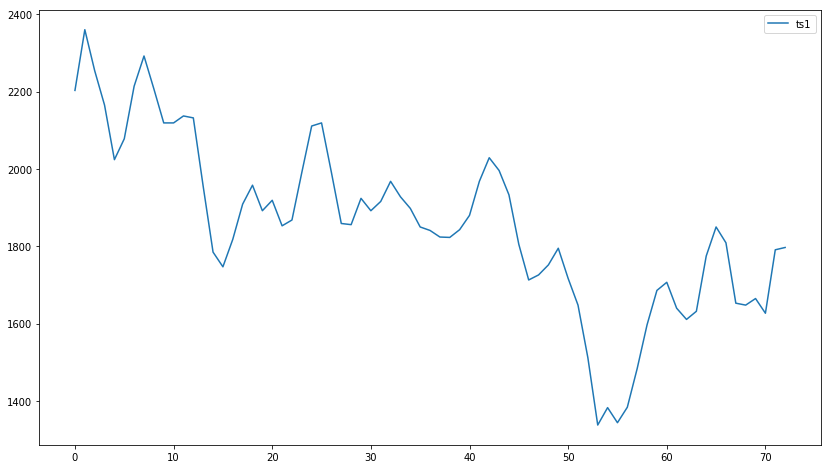

In [20]:
f.chart(ts1=ts4)

In [60]:
help(f.kpi)

Help on function kpi in module forecasting:

kpi(ts, forecast, round_to=1)
    Computes all the errors
    Usage:
        kpi(ts=time_series, forecast=forecast, round_to=round_to)
    
    Parameters:
        ts (list): A time series
        forecast (list): A forecast (computed with the forecast() function)
        round_to (int >= 0): Number of digits after comma
    
    Returns:
        Prints the errors on screen



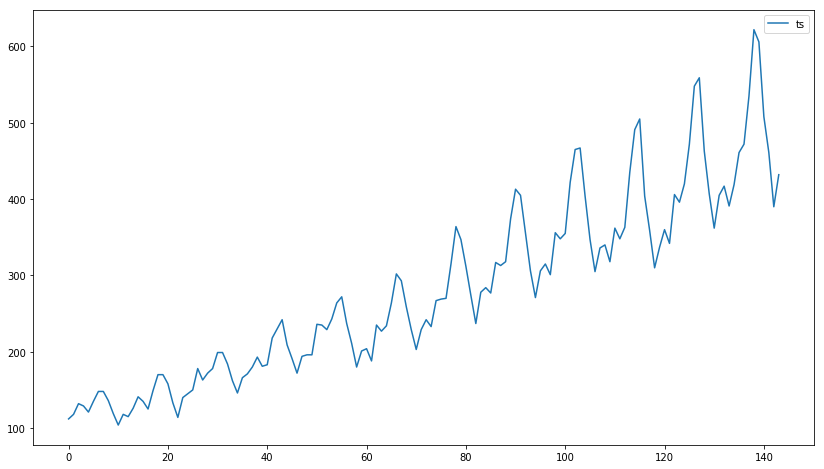

In [5]:
ts = f.data(2)
f.plot(ts=ts)

In [9]:
forecast = f.forecast(ts)

KeyError: False

In [10]:
from statsmodels.tsa import holtwinters

In [12]:
import statsmodels
import pandas as pd

In [2]:
statsmodels.__version__


'0.10.1'

In [51]:
model = holtwinters.ExponentialSmoothing(endog=pd.DataFrame(data=ts), trend='mul').fit(optimized=True)

In [52]:
x = model.predict(start=1, end=len(ts)+12)

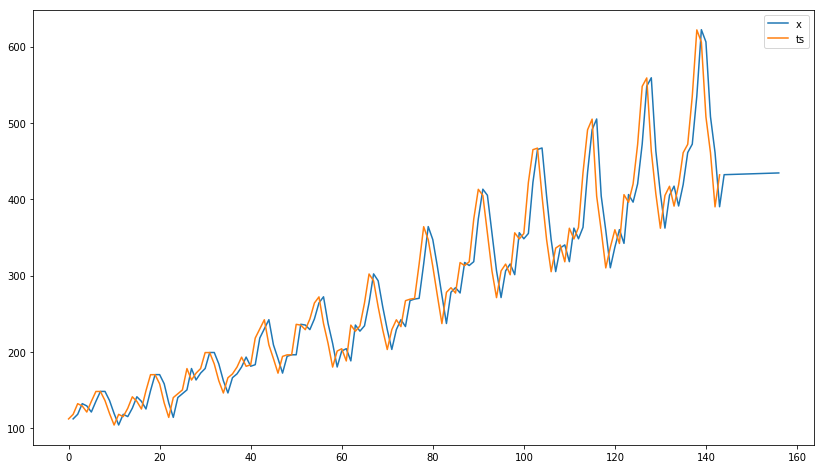

In [53]:
f.plot(x=x, ts=ts)

In [54]:
f.kpi(ts, x)

ME:  -0.1
MAE:  0.1
MAPE:  0.0 %
MSE:  0.0


In [50]:
model.model.params

{'damping_slope': nan,
 'initial_level': 241.74924216305686,
 'initial_seasons': array([0.4574813 , 0.4822679 , 0.53728133, 0.51222881, 0.478931  ,
        0.525246  , 0.5741368 , 0.5678844 , 0.51509255, 0.4459987 ,
        0.3911063 , 0.45304938]),
 'initial_slope': 1.0091536221616892,
 'lamda': None,
 'remove_bias': False,
 'smoothing_level': 0.29171036080059454,
 'smoothing_seasonal': 0.5677274055712594,
 'smoothing_slope': 7.716891538340447e-18,
 'use_boxcox': False}

In [55]:
1e-1

0.1

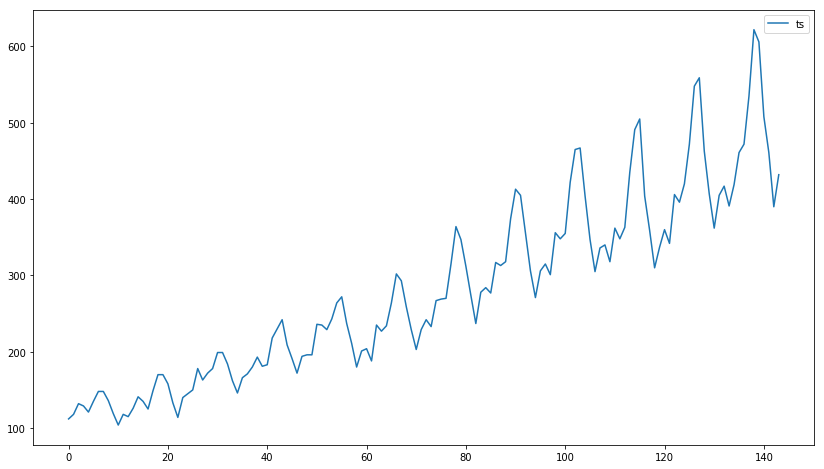

In [58]:
f.plot(ts=ts)

In [73]:
ft_ses = f.forecast(ts, alpha=0.5, debug=True)
ft_des = f.forecast(ts, alpha=0.5, beta=0.5, debug=True)
ft_tes = f.forecast(ts, alpha=0.5, beta=0.3, gamma=0.4, seasonal_periods=4, debug=True)

{'smoothing_level': 0.5, 'smoothing_slope': nan, 'smoothing_seasonal': nan, 'damping_slope': nan, 'initial_level': 118.17904022102618, 'initial_slope': nan, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}
{'smoothing_level': 0.5, 'smoothing_slope': 0.5, 'smoothing_seasonal': nan, 'damping_slope': nan, 'initial_level': 108.37299655821506, 'initial_slope': 6.335821401573266, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}
{'smoothing_level': 0.5, 'smoothing_slope': 0.3, 'smoothing_seasonal': 0.4, 'damping_slope': nan, 'initial_level': 271.99986605226206, 'initial_slope': 3.8125350032087235, 'initial_seasons': array([0.40600459, 0.41404156, 0.45543845, 0.45089424]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


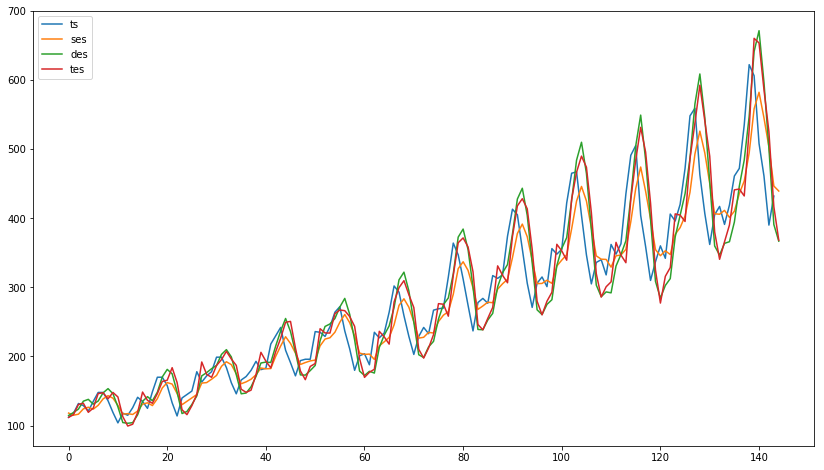

In [74]:
f.plot(ts=ts, ses=ft_ses, des=ft_des, tes=ft_tes)

In [77]:
f.kpi(ts, ft_ses)

ME:  4.5
MAE:  30.9
MAPE:  10.5 %
MSE:  1729.5


In [78]:
f.kpi(ts, ft_des)

ME:  -1.4
MAE:  38.2
MAPE:  13.4 %
MSE:  2584.8


In [80]:
f.kpi(ts, ft_tes)

ME:  -2.7
MAE:  38.8
MAPE:  13.7 %
MSE:  2791.0


In [104]:
ft_tes_opt = f.forecast(ts, seasonal_periods=12)

In [105]:
f.kpi(ts, ft_tes_opt)

ME:  2.2
MAE:  25.7
MAPE:  9.0 %
MSE:  1128.5


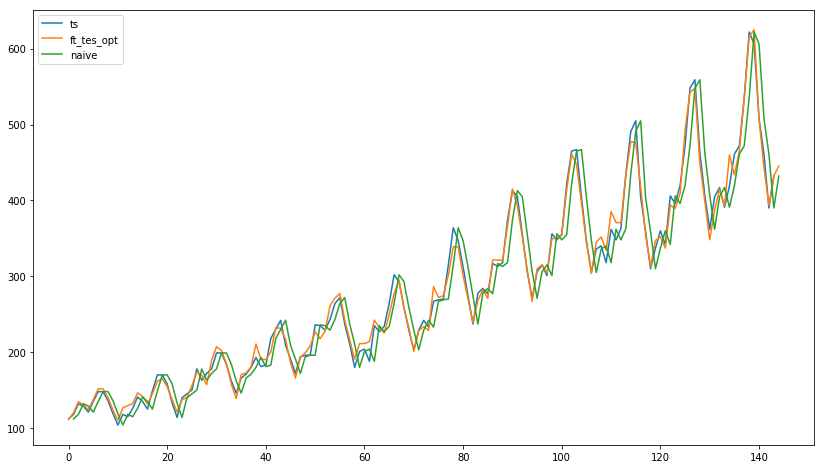

In [97]:
f.plot(ts=ts, ft_tes_opt=ft_tes_opt, naive=naive)

In [89]:
naive = f.naive(ts)

In [91]:
f.kpi(ts, naive)

ME:  2.2
MAE:  25.9
MAPE:  9.0 %
MSE:  1136.4


In [110]:
ts4=f.data(4)

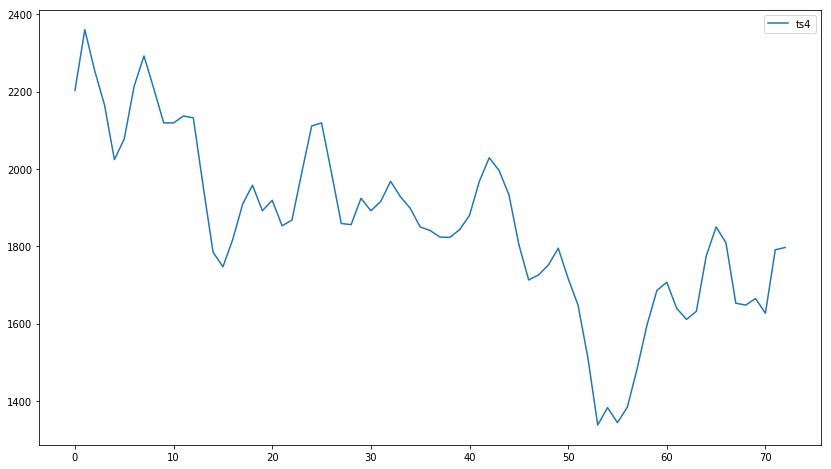

In [111]:
f.plot(ts4=ts4)

In [112]:
ft4 = f.forecast(ts4)

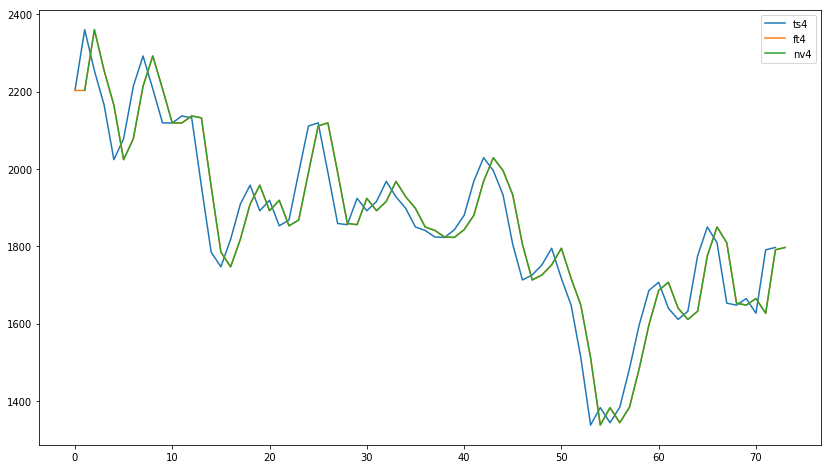

In [125]:
f.plot(ts4=ts4, ft4=ft4, nv4=naive4)

In [114]:
f.kpi(ts4, ft4)

ME:  -5.6
MAE:  66.2
MAPE:  3.6 %
MSE:  6840.5


In [123]:
ft4_opt = f.forecast(ts4, trend='add', seasonal='add', seasonal_periods=8, optimized=True, debug=True)

{'smoothing_level': 0.7368435691130026, 'smoothing_slope': 0.052631286177399456, 'smoothing_seasonal': 0.26316199351640757, 'damping_slope': nan, 'initial_level': 1889.4999999999798, 'initial_slope': 0.0, 'initial_seasons': array([313.5, 470.5, 364.5, 275.5, 134.5, 188.5, 324.5, 402.5]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


In [124]:
f.kpi(ts4, ft4_opt)

ME:  0.8
MAE:  75.0
MAPE:  4.2 %
MSE:  10240.9


In [117]:
naive4 = f.naive(ts4)

In [118]:
f.kpi(ts4, naive4)

ME:  -5.6
MAE:  67.1
MAPE:  3.7 %
MSE:  6935.5


In [ ]:
ft_ma4 = f.ma(ts4, 12)

In [127]:
f.kpi(ts4, ft_ma4)

ME:  -17.6
MAE:  105.4
MAPE:  5.9 %
MSE:  16680.0
